In [131]:
"""Note:this notebook contains only the plots and any calculations to make them,
any calculations of actual amounts is in cp1-notebook"""
import math
import csv
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

csv_arr=[]

#Another file reader, this one is slightly different to deal with multiple values
with open('output_file.csv') as csv_in:
  filereader = csv.reader(csv_in)
  for row in filereader:
    csv_arr.append(row)

#These are the initial conditions (they're not used for plotting, but are here for clarity's sake)
#Due to how csv_arr is written, these are contained in 2D arrays
a_lambda = float(csv_arr[0][0])
b_lambda = float(csv_arr[1][0])
parent_init = float(csv_arr[2][0])
daughter_init = float(csv_arr[3][0])
stable_init = float(csv_arr[4][0])
delta = float(csv_arr[5][0])
endtime = float(csv_arr[6][0])

#Analytical solutions and their x axis
x = [float(i) for i in csv_arr[7]]
mother = [float(i) for i in csv_arr[8]]
first_daughter = [float(i) for i in csv_arr[9]]
second_daughter = [float(i) for i in csv_arr[10]]
total_amount = [float(i) for i in csv_arr[11]]
            
#Numeric solutions and their x axis
numeric_parent = [float(i) for i in csv_arr[12]]
numeric_first_daughter = [float(i) for i in csv_arr[13]]
numeric_second_daughter = [float(i) for i in csv_arr[14]]
numeric_total = [float(i) for i in csv_arr[15]]
fine_axis = [float(i) for i in csv_arr[16]] #Note:the axis for the fine first daughter values is the same for all the base numeric solutions

#The coarse and medium first daughter solutions and their x axes
numeric_first_medium = [float(i) for i in csv_arr[17]]
medium_axis = [float(i) for i in csv_arr[18]]
numeric_first_coarse = [float(i) for i in csv_arr[19]]
coarse_axis = [float(i) for i in csv_arr[20]]

#The maximum first daughter times and their one over delta t's
max_time = [float(i) for i in csv_arr[21]]
over_deltat = [float(i) for i in csv_arr[22]]

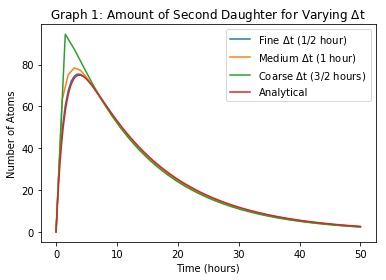

In [132]:
#First graph (varying delta t's)
plt.plot(fine_axis,numeric_first_daughter,label='Fine $\Delta$t (1/2 hour)')
plt.plot(medium_axis,numeric_first_medium,label='Medium $\Delta$t (1 hour)')
plt.plot(coarse_axis,numeric_first_coarse,label='Coarse $\Delta$t (3/2 hours)')
plt.plot(x,first_daughter,label='Analytical')
plt.xlabel('Time (hours)')
plt.ylabel('Number of Atoms')
plt.title('Graph 1: Amount of Second Daughter for Varying $\Delta$t')
plt.legend()

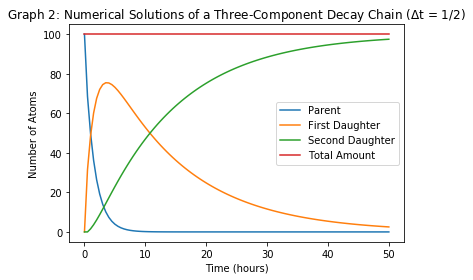

In [133]:
#Second graph (all numerical solutions)
#As said in the base notebook, all of the numeric solutions use the fine delta t
plt.plot(fine_axis,numeric_parent,label='Parent')
plt.plot(fine_axis,numeric_first_daughter,label='First Daughter')
plt.plot(fine_axis,numeric_second_daughter,label='Second Daughter')
plt.plot(fine_axis,numeric_total,label='Total Amount')
plt.xlabel('Time (hours)')
plt.ylabel('Number of Atoms')
plt.title('Graph 2: Numerical Solutions of a Three-Component Decay Chain ($\Delta$t = 1/2)')
plt.legend()

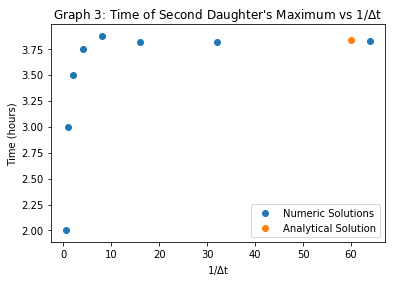

In [134]:
#Third graph (time of max second daughter vs one over delta t)
plt.scatter(over_deltat,max_time,label="Numeric Solutions")
#This is the same as the max_daughter function, but only for 1 point
plt.scatter(60,first_daughter.index(max(first_daughter))*1/60,label="Analytical Solution")
plt.xlabel('1/$\Delta$t')
plt.ylabel("Time (hours)")
plt.title("Graph 3: Time of Second Daughter's Maximum vs 1/$\Delta$t")
plt.legend()

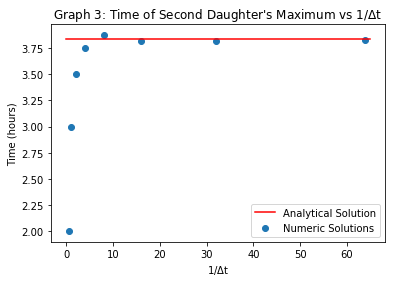

In [146]:
#Alternative graph 3, I don't know which is more correct 
ma = first_daughter.index(max(first_daughter))*1/60
plt.plot([0,65],[ma,ma],"r",label="Analytical Solution")
plt.scatter(over_deltat,max_time,label="Numeric Solutions")
plt.xlabel('1/$\Delta$t')
plt.ylabel("Time (hours)")
plt.title("Graph 3: Time of Second Daughter's Maximum vs 1/$\Delta$t")
plt.legend()